<h1><center>What Factors Make an Anime Popular</center></h1>

By Johnny Truong

Github repository link: https://github.com/jtruong2018/jtruong2018.github.io

_______________________________________________________________________________________________________________________________

<h1><center>What is Anime?</center></h1>

In countries outside of Japan, anime is a term that refers to animated shows that primarily originate from Japan. Lately, the term has become broader and has also been used to describe animated shows (regardless of origin) that are inspired by the style of Japanese animation.

Since anime originally started in Japan, it was most popular among the Japanese audience. Anime slowly gained popularity in countries outside of Japan, although many anime were not dubbed into other languages and oftentimes relied on fans putting subtitles in for their respective languages. In recent years anime has become increasingly popular in the Western world through various hits such as Demon Slayer, Attack On Titan, and Jujutsu Kaisen, just to name a few. As a result, companies have begun to officially license more anime to bring to the western world. This has caused official translations and proper dubbing for these shows to become more common. This has also garnered the attention of major companies such as <a href="https://www.whats-on-netflix.com/news/netflix-anime-movie-bubble-coming-to-netflix-in-april-2022/">Netflix</a> and <a href="https://www.thegamer.com/original-anime-series-coming-to-disney-next-year/">Disney</a> to fund the production of their own anime.

<h1><center>Source of the Data</center></h1>

The data is retrieved from a website called <a href="https://www.kaggle.com/marlesson/myanimelist-dataset-animes-profiles-reviews/version/1">kaggle</a>, which is a website that hosts a large repository of datasets for users to use. The data can be found in the hyperlink, labeled 'animes.csv'. 

The dataset that I am using was scraped from a website called <a href="https://www.myanimelist.net">MyAnimeList</a>. This data was turned into a csv file and posted on kaggle. The data in the csv file was retrieved from the website on 05/01/2020. MyAnimeList is a popular anime website used by many anime fans. Users primarily use this website to be informed about various aspects of anime (e.g. genre, air date, etc.), keep track of the anime they will watch on their list, and review the anime they have watched.

<h1><center>Required Libraries and Imports</center></h1>

The libraries we will need are imported below. The libraries that will be needed at matplotlib, numpy, pandas, skylearn and statsmodels.

In [80]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OrdinalEncoder
import statsmodels.api as sm
from statsmodels.formula.api import ols

<h1><center>Importing Data</center></h1>

To import the data into a dataframe, I will use pandas to read the csv file.

In [81]:
data = pd.read_csv('animes.csv')

<h1><center>Setting Up and Cleaning the Data for Analysis</center></h1>

For this section, we will mostly use pandas to set up and clean the data. More information about pandas can be found <a href="https://pandas.pydata.org/docs/user_guide/index.html">here</a>.

The dataset contained duplicate rows of data for each anime title, so first I had to remove the duplicate rows. To make the data easier to look at, I sorted by popularity. The popularity metric is determined by the amount of users who added the anime to their anime list, so the more users that added it to their list, the more popular it is.

In [82]:
data = data.drop_duplicates(subset='title')
data = data.sort_values(by=['popularity'])

To make analysis easier, I extracted the year when an anime started airing and turned it into a new column. This part required some cleaning since the dates were stored in a variety of formats, which were all accounted for. Some anime did not have a start date available yet (meaning it's air date is unknown, but it will air in the future), so those rows of data were removed since there is not enough data on them yet for analysis. Furthermore, since this dataset was taken in May 2020, I decided to omit any rows of data where the air date was 2020 since analysis for this year would not give an accurate representation since we cannot consider the data for the year as a whole.

In [83]:
def date_extract(x):
    date = x.split()
    if (len(date) == 4):
        return int(x.split()[1])
    if (len(date) == 3):
        if (date[0].isnumeric()):
            return int(x.split()[0])
        else:
            return int(x.split()[2])
    elif (len(date) > 2):
        if (date[2].isnumeric()):
            return int(x.split()[2])
        elif(date[1].isnumeric()):
            return int(x.split()[1])
        else:
            return int(x.split()[0])
    elif (len(date) == 1):
        return int(x)

data = data[data['aired'] != 'Not available']
data['air_start_year'] = data['aired'].apply(date_extract)
data = data[data['air_start_year'] < 2020]

To make analysis easier, I will format the genre column down below.

In [84]:
data['genre'] = data['genre'].str.replace('[', '')
data['genre'] = data['genre'].str.replace(']', '')
data['genre'] = data['genre'].str.replace('\'', '')
data['genre'] = data['genre'].str.replace('\s', '')
data['genre'] = data['genre'].str.split(',')

I then dropped columns that will not be needed for analysis such as the synopsis and link to the page for the anime. Further cleaning of the data was needed as some anime did not have data for its' scores and ranking, which were marked as NaN, which is a value that basically means it is not available. Since that data was not available, I removed those rows of data too since those columns are necessary for analysis later on.

In [85]:
data = data.drop(columns=['synopsis', 'uid', 'img_url', 'link', 'aired'])
data = data[data['score'].notna()]
data = data[data['episodes'].notna()]
data

,title,genre,episodes,members,popularity,ranked,score,air_start_year
740,Death Note,"[Mystery, Police, Psychological, Supernatural,...",37.0,1871043,1,52.0,8.65,2006.0
681,Shingeki no Kyojin,"[Action, Military, Mystery, SuperPower, Drama,...",25.0,1754979,2,111.0,8.47,2013.0
8409,Sword Art Online,"[Action, Adventure, Fantasy, Game, Romance]",25.0,1657823,3,1771.0,7.49,2012.0
3,Fullmetal Alchemist: Brotherhood,"[Action, Military, Adventure, Comedy, Drama, M...",64.0,1615084,4,1.0,9.23,2009.0
16,One Punch Man,"[Action, Sci-Fi, Comedy, Parody, SuperPower, S...",12.0,1475219,5,50.0,8.68,2015.0
...,...,...,...,...,...,...,...,...
12712,Robot Trains,[Kids],32.0,25,16315,13668.0,4.00,2015.0
14066,Tokyo Mikansei,"[Dementia, Music]",1.0,26,16316,14253.0,7.33,2013.0
13941,Usagi no Mofy (TV 2014),[Kids],26.0,29,16317,14374.0,6.00,2014.0
13937,Usagi no Mofy (TV 2016),[Kids],26.0,30,16319,14375.0,4.50,2016.0


<h1><center>Analysis</center></h1>

In this section I will analyze various metrics and see if there is a trend between them and an anime's popularity. In particular, I will look at three different metrics: user score, the year the anime started airing, genres. This analysis will be useful for anime licensors decide what kind of animes they should license and anime producers to see what kinds of anime they may want to help produce. 

<h3>Analyzing User Score vs. Popularity</h3>

The first metric I will use is the average user score, which is the average score that users rated the anime on a scale from 1 to 10. Down below, I will make a scatterplot of the average user scores against the amount of users that watched the anime (they have the anime on their list). Furthermore, I will add a regression line to show the trend between score and popularity.

Text(0.5, 1.0, 'Average User Score vs Popularity')

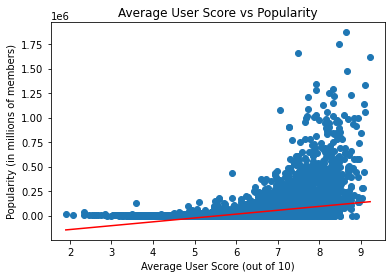

In [86]:
plt.plot(data['score'], data['members'], 'o')
m, b = np.polyfit(data['score'], data['members'], 1)
x = np.linspace(data['score'].min(), data['score'].max())
plt.plot(x, m*x+b, color = 'r')
plt.xlabel('Average User Score (out of 10)')
plt.ylabel('Popularity (in millions of members)')
plt.title('Average User Score vs Popularity')

From the regression line, we see an increasing linear correlation between the average user score and the popularity of an anime. The higher an anime is scored by users, the more likely it will be popular. We also see this in the scatterplot points, where the higher the user score is, the more points you see that go higher up for the amount of users that watched the show. Logically, this makes sense because generally if a show is good, more people would likely have heard about it and thus, more people would likely be inclined to watch the show to see if it lives up to the reputation it has gotten. 

However, it is important to realize that average user score can be a flawed metric to use to correlate to popularity for various reasons. For example, the average user score could be skewed heavily if not a lot of people have watched the show yet, so the scores from those people would have more weight to it and thus may not accurately reflect how good a show is. An example of this is within the graph, where you notice that there are a few shows with a score of about 9, but the amount of people that have watched it is very low. Another reason why average user score could be a flawed metric is because everyone may have a different rating system. For example, my defintion of a 7/10 show could be different from what someone else considers to be a 7/10 show. Overall, user rating may be a flawed metric to associate with the popularity of an anime since it is such a subjective metric, but it can be used to get a rough general consensus of what viewers think about the show

<h3>Initial Year Aired vs. Popularity</h3>

Here I will see if the year an anime started airing has an effect on how popular it will be. First, I grouped up the anime by the year that it aired. I then took the average of the how many people watched the anime for each of the years.

In [87]:
year = data.groupby('air_start_year', as_index = False)
year = year.mean('members')
year

,air_start_year,episodes,members,popularity,ranked,score
0,1917.0,1.000000,640.083333,11997.083333,11694.666667,5.902500
1,1918.0,1.000000,463.142857,11893.285714,10827.000000,5.935714
2,1924.0,1.000000,359.000000,12752.333333,11801.333333,5.503333
3,1925.0,1.000000,277.666667,12761.666667,11284.000000,5.576667
4,1926.0,1.000000,437.333333,12239.666667,10813.500000,5.673333
...,...,...,...,...,...,...
91,2015.0,9.033378,49533.998665,7116.397864,6878.216763,6.410895
92,2016.0,9.486486,41011.745006,7143.050529,6980.666248,6.406663
93,2017.0,8.017689,32404.321934,7707.609670,7159.256281,6.399387
94,2018.0,8.792428,32407.597911,7385.335509,6832.831737,6.488681


Down below, I will create a line plot that shows the the average popularity of shows over time.

Text(0.5, 1.0, 'Average Popularity of Anime over Time')

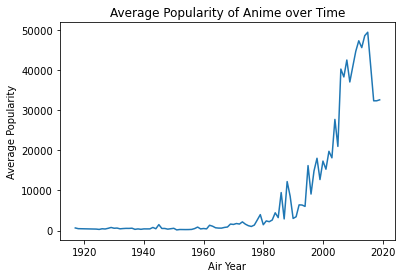

In [88]:
plt.plot(year['air_start_year'], year['members'])
plt.xlabel('Air Year')
plt.ylabel('Average Popularity')
plt.title('Average Popularity of Anime over Time')

From this chart we see a huge difference in popularity between older and newer anime. Anime that released from the 1920s up until 1980 seem to have very little popularity. However, starting at around 1980, we start to see anime gaining popularity. Starting at 2000 and beyond, we see an explosion in the average popularity of anime that released during those years. 

This explosion in popularity could be due to multiple factors. First we will look at the simplest factor. Down below we will plot the amount of anime released each year over time.

Text(0.5, 1.0, 'Amount of Anime Released Each Year')

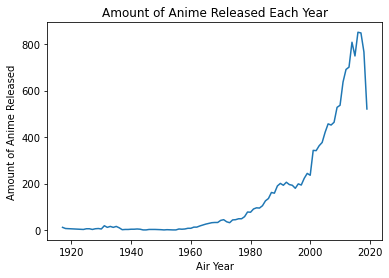

In [89]:
year_inv = pd.DataFrame(data.groupby('air_start_year', as_index = False).size())
plt.plot(year_inv['air_start_year'], year_inv['size'])
plt.xlabel('Air Year')
plt.ylabel('Amount of Anime Released')
plt.title('Amount of Anime Released Each Year')

We see that starting at around 1980 the amount of anime produced yearly also started to increase, which was also when anime began to see an increase in average popularity. More anime being released means that there will more likely be a show that will match with someone's interests in terms of plot or genres. Thus, it could bring more people to watch anime. However, quantity does not help if the quality is low. Thus, let us investigate further to compare quality (in terms of user scores) has also increased over time.

Text(0.5, 1.0, 'Average User Score Over Time')

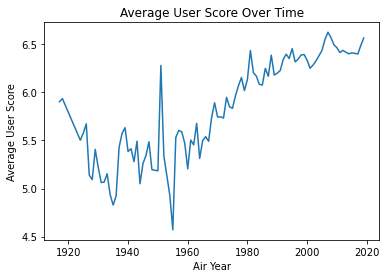

In [90]:
year_inv = data.groupby('air_start_year', as_index = False)
year_inv = year_inv.mean('score')
plt.plot(year_inv['air_start_year'], year_inv['score'])
plt.xlabel('Air Year')
plt.ylabel('Average User Score')
plt.title('Average User Score Over Time')

Here we see that generally, there seems to be an increasing trend in average user scores over time, with a little bit of fluctuation between years. The years before 1980 have a noticeably lower user score compared to the years after 1980, so in general there seems to be a slight increase in the audience's enjoyment of anime, which could help explain the increase in popularity. As stated previously, the ratings are subjective, but this could also imply a general quality increase in the plot, themes and production quality of anime over time.

<h3>Genre vs. Popularity</h3>

Now we will see if there is a trend in genres and popularity. The first thing that must be done is getting a list of all the genres which is done below.

In [91]:
genre_lst = data["genre"].explode().unique() 
genre_lst.sort()
genre_lst = np.delete(genre_lst, 0, 0)

First let us see what the most common genre is. Below, we will go through the data and see how many times each genre appears in each anime's list of genres.

In [92]:
copy = data.copy(deep = True)
genre = pd.DataFrame(data=genre_lst, columns=['Genre'])
genre['Count'] = 0

for i in range (0, len(genre_lst)):
    for rows in copy['genre']:
        if(genre['Genre'][i] in rows):
            genre.at[i, 'Count'] += 1

To interpret the data we generated above, I will create a bar chart showing genres and the amount of anime with that genre. To make it easier for interpretation, I will sort it from least to greatest in terms of count of anime with that genre.

Text(0.5, 1.0, 'Count of Anime within a Genre')

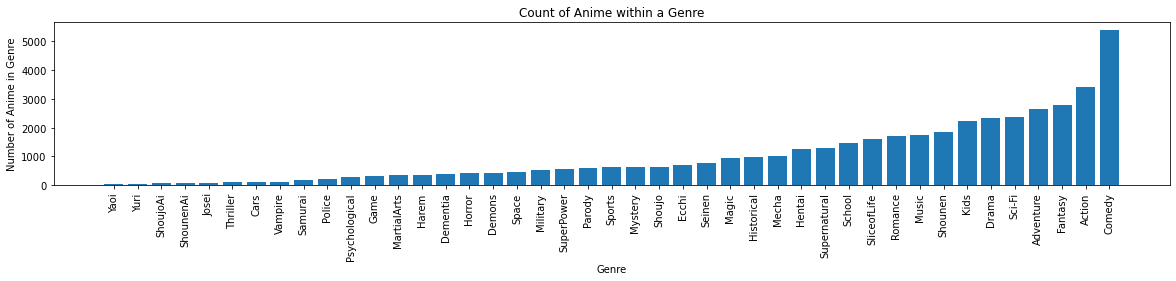

In [93]:
genre = genre.sort_values('Count')
plt.figure(figsize=(20, 3))
plt.bar(x = genre['Genre'], height = genre['Count'])
_ = plt.xticks(rotation='vertical')
plt.xlabel('Genre')
plt.ylabel('Number of Anime in Genre')
plt.title('Count of Anime within a Genre')

From the bar graph we see that anime is mostly concentrated within a few genres whereas other genres do not have a lot of anime. Using this data, let us do further analysis and see if there is any trend between genre of the anime produced over time. First, a new dataframe is created. For each year, the amount of anime that belongs to each genre will be counted up.

In [94]:
cpy = copy.copy(deep = True)
for genres in genre_lst:
    cpy[genres] = 0

for genres in genre_lst:
    cpy[genres] = cpy['genre'].apply(lambda y: 1 if genres in y else 0)

cpy = cpy.groupby('air_start_year', as_index = False).sum()
cpy

,air_start_year,episodes,members,popularity,ranked,score,Action,Adventure,Cars,Comedy,...,ShounenAi,SliceofLife,Space,Sports,SuperPower,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,1917.0,12.0,7681,143965,140336.0,70.83,0,0,0,8,...,0,0,0,0,0,0,0,0,0,0
1,1918.0,7.0,3242,83253,75789.0,41.55,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1924.0,3.0,1077,38257,35404.0,16.51,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1925.0,6.0,1666,76570,67704.0,33.46,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,1926.0,6.0,2624,73438,64881.0,34.04,0,2,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2015.0,6766.0,37100965,5330182,4759726.0,4801.76,170,76,8,303,...,2,124,11,23,33,81,6,12,0,3
92,2016.0,8073.0,34900995,6078736,5563591.0,5452.07,179,92,13,308,...,7,113,18,45,23,95,6,8,1,0
93,2017.0,6799.0,27478865,6536053,5698768.0,5426.68,174,94,8,264,...,4,127,13,32,30,77,3,9,0,0
94,2018.0,6735.0,24824220,5657167,4994800.0,4970.33,202,90,4,255,...,8,126,14,27,36,87,12,9,1,0


Now we will plot the count of genres over time to see if there is a trend in genres produced over the years. Since there are so many genres it would be hard to interpret if they were all plotted in one graph. Thus, they were separated into a few different graphs, where they were grouped by how much anime were produced for that genre overall (greatest to least order).

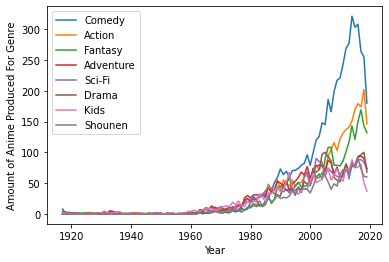

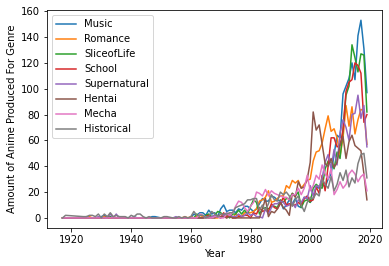

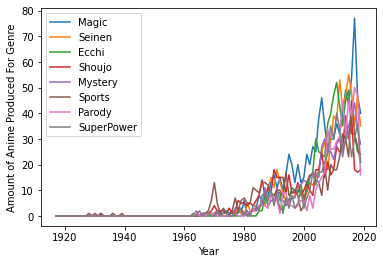

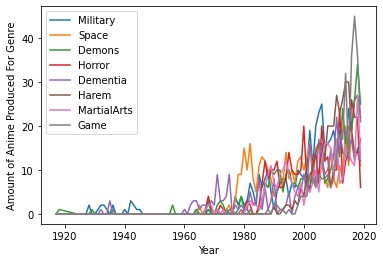

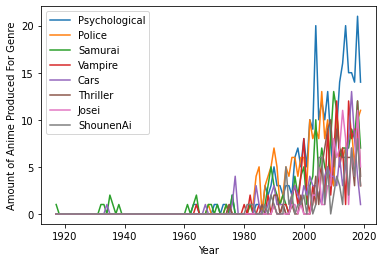

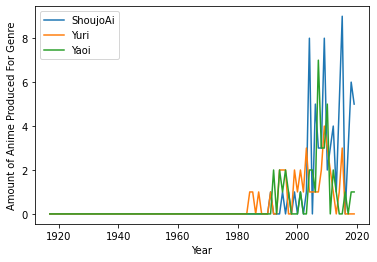

In [95]:
genre = genre.sort_values('Count', ascending = False)

for i in range(0, 100, 8):
    top_genre = genre['Genre'].iloc[i:i + 8]
    for genres in top_genre:
        plt.figure(i)
        plt.plot(cpy['air_start_year'], cpy[genres], label = genres)
        plt.xlabel("Year")
        plt.ylabel("Amount of Anime Produced For Genre")
        plt.legend()

From these graphs we see that the genres produced over the years fluctuate a lot. After the 1980s we see a large increase in the variety of genres being produced for anime. This variety of genres could be one of the influences in increasing the popularity of anime over time as it brings in more people with different interests.

Let us see if the reason why some genres are produced more is because they are more popular amongst anime viewers. The code below will count up the total popularity (in terms of users) for each genre and calculate the average popularity for each genre, where average popularity is:
<br>(total popularity in genre) / (amount of anime in that genre).</br>

In [96]:
genre['avg_pop'] = 0
genre['total_pop'] = 0

avg_pop = dict.fromkeys(genre_lst, 0)
for genres in genre_lst:
    avg_pop[genres] += copy.apply(lambda y: y['members'] if genres in y['genre'] else 0, axis = 1)


In [97]:
i = 0
for genres in genre['Genre']:
    genre.loc[genre['Genre'] == genres, 'avg_pop'] = (avg_pop[genres].sum())  / genre.iloc[i]['Count']
    genre.loc[genre['Genre'] == genres, 'total_pop'] = (avg_pop[genres].sum())
    i = i + 1


A bar graph is then generated showing each genre and the total popularity in each genre in hundred of millions of users.

Text(0.5, 1.0, 'Total Popularity of each Anime Genre')

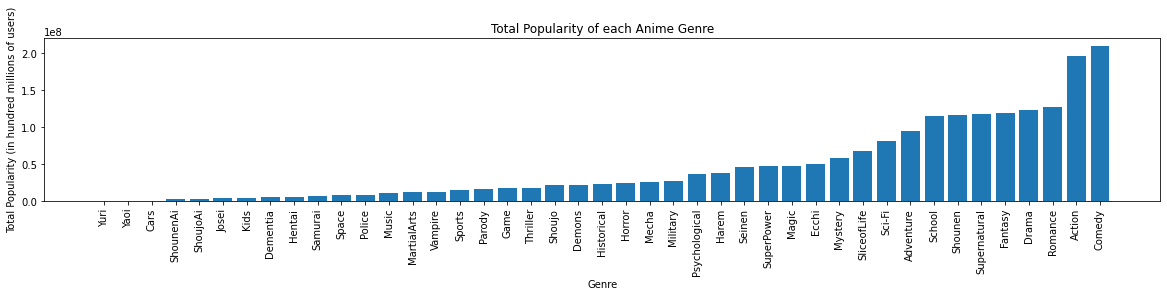

In [98]:
tot_pop = genre.sort_values('total_pop', ascending = True)
plt.figure(figsize=(20, 3))
plt.bar(x = tot_pop['Genre'], height = tot_pop['total_pop'])
_ = plt.xticks(rotation='vertical')
plt.xlabel('Genre')
plt.ylabel('Total Popularity (in hundred millions of users)')
plt.title('Total Popularity of each Anime Genre')

From this bar graph we see that some genres are much more popular than others. When compared to the line graphs shown previously, generally it seems that the top genres in terms of total popularity have more anime produced than the ones that are less popular. This makes sense as production companies would want to keep viewers engaged with things that they enjoy.

Let us now look at the average popularity of each genre and see if the popularity is spread "evenly" within each genre. We will now plot a bar graph showing the average popularity of each genre.

Text(0.5, 1.0, 'Average Popularity of each Anime Genre')

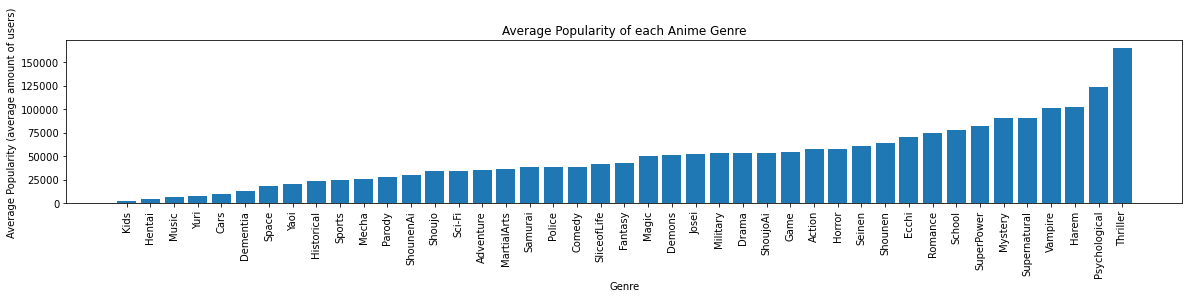

In [99]:
av_pop = genre.sort_values('avg_pop', ascending = True)
plt.figure(figsize=(20, 3))
plt.bar(x = av_pop['Genre'], height = av_pop['avg_pop'])
_ = plt.xticks(rotation='vertical')
plt.xlabel('Genre')
plt.ylabel('Average Popularity (average amount of users)')
plt.title('Average Popularity of each Anime Genre')

When comparing the average popularity chart to the total popularity chart we see a dramatic shift in which genres are at the top end of it. For example, comedy was on the high end of the total popularity chart, but in terms of average popularity it is in the middle of the pack. Thus, this means that although more anime are produced for certain genres, this does not necessarily guarantee that the anime will be popular since it is a part of that genre. For genres that have a lot of anime produced with high total popularities, it is likely that the popularity is concentrated within a few select anime within the genre, whereas the rest within that genre are not as popular as those select anime.

As such, it is likely that although some genres are overall, more popular than others, genres are not necessarily a good indicator of how popular an anime can be since it can be hit or miss as discussed in the last paragraph. However, they can be used as a general indicator of what viewers may like, since there is generally a distinct and major difference in popularity between genres in the higher end versus the lower end of the bar graph.

<h1><center>Hypothesis Testing and Machine Learning</center></h1>

Through the analysis, it was determined that the most likely factors that influence popularity would be user score and the year the anime initially released. Let us test our <a href="https://www.investopedia.com/terms/n/null_hypothesis.asp">null hypotheses</a>, starting with score affecting popularity.

In [100]:
learn = data.copy(deep = True)

In [101]:
ols(formula = "popularity ~ score", data = learn).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                 1.229e+04
Date:                Mon, 20 Dec 2021   Prob (F-statistic):               0.00
Time:                        15:55:30   Log-Likelihood:            -1.4624e+05
No. Observations:               15268   AIC:                         2.925e+05
Df Residuals:                   15266   BIC:                         2.925e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.863e+04    188.175    152.128      0.000    2.83e+04     2.9e+04
score      -3240.8292     29.235   -110.853      0.000   -3298.134   -3183.524
==============================================================================
Omnibus:                      539.055   Durbin-Watson:                   0.832
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              810.761
Skew:                           0.344   Prob(JB):                    8.82e-177
Kurtosis:                       3.894   Cond. No.                         43.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From this we see that the P Value of the F-Statistic is 0, which is less than 5%, so this means that there is basically no relationship between score and popularity. Thus, we can reject the null hypothesis about score's relationship with popularity.

Next, we will test the null hypothesis that the start year of the anime has a relationship with popularity.

In [102]:
ols(formula = "popularity ~ air_start_year", data = learn).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     1166.
Date:                Mon, 20 Dec 2021   Prob (F-statistic):          2.17e-246
Time:                        15:55:30   Log-Likelihood:            -1.5019e+05
No. Observations:               15268   AIC:                         3.004e+05
Df Residuals:                   15266   BIC:                         3.004e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.798e+05   5030.156     35.741      0.000     1.7e+05     1.9e+05
air_start_year   -85.7154      2.510    -34.151      0.000     -90.635     -80.796
==============================================================================
Omnibus:                     4096.779   Durbin-Watson:                   0.134
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              767.103
Skew:                           0.197   Prob(JB):                    2.67e-167
Kurtosis:                       1.975   Cond. No.                     2.75e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From this we see that the P Value of the F-Statistic a very small number, which is basically close to 0. Since it is less than 5%,  this means that there is almost no relationship between air start date and popularity. Thus, we can reject the null hypothesis about the start date's relationship with popularity.

Lastly, we will test our last null hypothesis, which is that combined, score and air start year has a relationship with popularity.

In [103]:
ols(formula = "popularity ~ score + air_start_year", data = learn).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     6698.
Date:                Mon, 20 Dec 2021   Prob (F-statistic):               0.00
Time:                        15:55:30   Log-Likelihood:            -1.4594e+05
No. Observations:               15268   AIC:                         2.919e+05
Df Residuals:                   15265   BIC:                         2.919e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.238e+05   3844.823     32.198      0.000    1.16e+05    1.31e+05
score          -3108.2536     29.160   -106.591      0.000   -3165.412   -3051.096
air_start_year   -47.9088      1.933    -24.781      0.000     -51.698     -44.119
==============================================================================
Omnibus:                      589.706   Durbin-Watson:                   0.861
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              824.787
Skew:                           0.391   Prob(JB):                    7.94e-180
Kurtosis:                       3.827   Cond. No.                     2.78e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.78e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In this case, we the P Value of the F-Statistic is 0, which is less than 5%, so this means that there is basically no relationship for score and air start year to popularity. Thus, we can also reject this null hypothesis.

Next, we will try to see how well we can predict popularity from user score, air year, and those two metrics combined. For this we will do some <a href="https://en.wikipedia.org/wiki/Regression_analysis">regression analysis</a> using a Random Forest Regressor.

<h3>Predicting popularity from user score</h3>

For this, we will see how well popularity can be predicted from user score.

In [104]:
convert = learn['score'].to_numpy().reshape(-1,1)
t = RandomForestRegressor()
t.fit(convert, learn['popularity'])
str(100 * t.score(convert, learn['popularity'])) + "% accuracy"

'50.799579771378454% accuracy'

From this we see that user score is not a very accurate way of measuring popularity as it has an accuracy of 50%. As mentioned earlier in the analysis section, generally the higher the user score is, the more likely it will have a higher popularity, but user score is subjective in many ways, which may not make it a very accurate measure. Thus, since user score is such a subjective measurement, it could explain why the accuracy is so low here.

<h3>Predicting popularity from air year</h3>

Next, let us see if the air year of the anime is any better at predicting the popularity of anime.

In [105]:
convert = learn['air_start_year'].to_numpy().reshape(-1,1)
t = RandomForestRegressor()
t.fit(convert, learn['popularity'])
str(100 * t.score(convert, learn['popularity'])) + "% accuracy"

'9.081780784049664% accuracy'

Here we see that the air year is an extremely inaccurate way of measuring popularity. Although we saw that there was an increasing trend where the newer the anime was, the more popular it was on average. However, a reason why this accuracy might be so low is because the popularity of newer anime is not evenly spread out, especially considering that more and more anime get produced as time progresses. As an example, although there may be a lot more anime each year, thus increasing the average popularity of anime for a particular year, this popularity might be concentrated within one or two anime, whereas the hundreds of others will be much less popular. Thus, it can make it hard to accurately predict the popularity of anime just based on the release year alone.

<h3>Predicting popularity from user score and air year</h3>

Next, we will see if using both score and air year is good at accurately seeing the popularity of an anime. 

In [106]:
convert = ['score', 'air_start_year']
convert = OrdinalEncoder().fit_transform(learn[convert])
t = RandomForestRegressor()
t.fit(convert, learn['popularity'])
str(100 * t.score(convert, learn['popularity'])) + "% accuracy"

'77.274918877984% accuracy'

Using both of those metrics has given much better results in accurately predicting the popularity of an anime. Thus, it is clear that it is likely that both score and the air year of the anime are important for the popularity of anime. In context, using these two metrics together is likely a decent accurate measure of popularity for several reasons. We saw anime was becoming more popular each year, so people are most likely going to watch newer anime. Furthermore, people will want to watch good anime, so those that are higher rated by others will likely peak a viewer's interest. Thus, more people are interested in newer anime that are good.

<h1><center>Conclusion</center></h1>

Through the analysis and machine learning, a lot of insight was gained into the various aspects of anime and what factors into an anime's popularity. It was found that over time, more people watch anime each year. Furthermore, it was found that there was a linear relationship between the user score (general audience consensus) and the popularity of an anime. Over time, anime also began to incorporate a higher variety of genres which also lines up with when the popularity of anime started to increase a lot. However, it is hard to predict how popular an anime will be based on its genre we saw that viewership is inconsistent within each genre. It is also hard to predict how popular an anime will be if user score and start year are looked at individually. However, by looking at both user score and start year together, the prediction of the popularity of anime is much more accurate. Viewers are more likely to watch shows that are newer and have many good aspects (good audience consensus) to it. This insight could be helpful to anime licensors in deciding where to help decide which animes to license and whether it is worth using their money to license them. 

However, these findings could still be improved upon as it only touches the top level of some of the aspects of anime. There are many things that could affect user score, such as how well a plot is written, how good the animation is, and much more. Furthermore, a further investigation could be done into the specifics of what is causing newer anime to be more popular than the ones that came before. This could bring up factors such as budget allocation, animation staff, production values, and newer technology that makes new anime better than previous years that could be causing an increase in popularity. By investigating further, this information could be useful for a larger audience, particularly for anime production committees and anime studios as they seek to be more successful in the anime industry.